In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Raw Data Reading

## Data Reading

In [1]:
file_name = "/content/dataset_crawler-google-places_2023-11-14_14-22-00-615.csv"
df = pd.read_csv(file_name)

NameError: ignored

In [ ]:
df.head()

isLocalGuide  likesCount               name      publishAt  \
0         False           0  I Gusti Ketut Ari  10 bulan lalu   
1         False           1           Andro Id   5 tahun lalu   
2         False           0       Dudy Nugroho   3 tahun lalu   
3         False           0       Rezy Septias  11 bulan lalu   
4         False           3        icksan ican   5 tahun lalu   

            publishedAtDate  rating responseFromOwnerDate  \
0  2022-12-25T14:00:02.314Z     NaN                   NaN   
1  2018-03-04T06:09:36.737Z     NaN                   NaN   
2  2020-03-08T13:10:21.342Z     NaN                   NaN   
3  2022-12-10T11:42:17.191Z     NaN                   NaN   
4  2018-02-10T12:12:21.206Z     NaN                   NaN   

                               reviewId  \
0   ChZDSUhNMG9nS0VJQ0FnSUNCam9iQWJnEAE   
1   ChZDSUhNMG9nS0VJQ0FnSUNnNGNmUUxnEAE   
2  ChdDSUhNMG9nS0VJQ0FnSURzNmNMVTN3RRAB   
3   ChZDSUhNMG9nS0VJQ0FnSUQtMjl6SUhREAE   
4  ChdDSUhNMG9nS0VJQ0FnSURRd19LaDB3RRAB   

                                           reviewUrl             reviewerId  \
0  https://www.google.com/maps/reviews/data=!4m8!...  105851092193672758200   
1  https://www.google.com/maps/reviews/data=!4m8!...  108231863008371813143   
2  https://www.google.com/maps/reviews/data=!4m8!...  111591703485838604661   
3  https://www.google.com/maps/reviews/data=!4m8!...  116141962919685336965   
4  https://www.google.com/maps/reviews/data=!4m8!...  118189989158380532885   

   ...  reviewsDistribution/oneStar reviewsDistribution/twoStar  \
0  ...                            0                           0   
1  ...                            0                           0   
2  ...                            0                           0   
3  ...                            0                           0   
4  ...                            0                           0   

             state  reviewsCount       city location/lat location/lng  \
0  Sulawesi Tengah            17  Kota Palu    -0.919686   119.893217   
1  Sulawesi Tengah            17  Kota Palu    -0.919686   119.893217   
2  Sulawesi Tengah            17  Kota Palu    -0.919686   119.893217   
3  Sulawesi Tengah            17  Kota Palu    -0.919686   119.893217   
4  Sulawesi Tengah            17  Kota Palu    -0.919686   119.893217   

                         title           categoryName description  
0  Warung Mas Ari Dewi Sartika  Restoran Masakan Ayam         NaN  
1  Warung Mas Ari Dewi Sartika  Restoran Masakan Ayam         NaN  
2  Warung Mas Ari Dewi Sartika  Restoran Masakan Ayam         NaN  
3  Warung Mas Ari Dewi Sartika  Restoran Masakan Ayam         NaN  
4  Warung Mas Ari Dewi Sartika  Restoran Masakan Ayam         NaN  

[5 rows x 110 columns]

In [ ]:
df.columns

Index(['isLocalGuide', 'likesCount', 'name', 'publishAt', 'publishedAtDate',
       'rating', 'responseFromOwnerDate', 'reviewId', 'reviewUrl',
       'reviewerId',
       ...
       'reviewsDistribution/oneStar', 'reviewsDistribution/twoStar', 'state',
       'reviewsCount', 'city', 'location/lat', 'location/lng', 'title',
       'categoryName', 'description'],
      dtype='object', length=110)

In [ ]:
df_1 = df[['text', 'stars']]

In [ ]:
df_1

text  stars
0     Tidak ada pilihan alternatif pembayaran non tunai      3
1                           Warung Mas Ari Dewi Sartika      3
2                                                   NaN      3
3     Lokasinya depan mesjid atau tidak jauh dari la...      4
4     Selain menyediakan ayam, tempe dan tahu penyet...      4
...                                                 ...    ...
5923                                             Mantap      5
5924                                                NaN      5
5925                                                NaN      4
5926  Bagi no hp bos mau pesan antar buat buka bersa...      3
5927                                                NaN      2

[5928 rows x 2 columns]

## Drop baris yang memiliki nilai kosong (NaN)

In [ ]:
df_1 = df_1.dropna(subset=['text'])
df_1.shape[0]

2844

In [ ]:
df_1

text  stars
0     Tidak ada pilihan alternatif pembayaran non tunai      3
1                           Warung Mas Ari Dewi Sartika      3
3     Lokasinya depan mesjid atau tidak jauh dari la...      4
4     Selain menyediakan ayam, tempe dan tahu penyet...      4
5                                              Mantappp      4
...                                                 ...    ...
5914                            Anda puas kami lemas...      5
5921                  Senang saja biar tau posisi rumah      5
5922                                Yang jual wong jowo      5
5923                                             Mantap      5
5926  Bagi no hp bos mau pesan antar buat buka bersa...      3

[2844 rows x 2 columns]

## Simple Visualization (just checking)

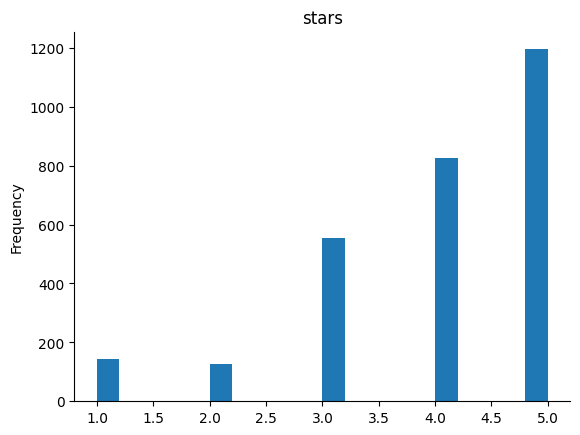

In [ ]:
from matplotlib import pyplot as plt
df_1['stars'].plot(kind='hist', bins=20, title='stars')
plt.gca().spines[['top', 'right',]].set_visible(False)

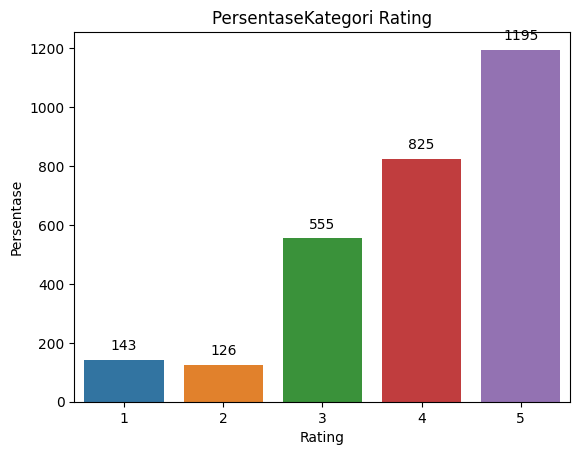

In [ ]:
ax = sns.countplot(x='stars', data=df_1)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('PersentaseKategori Rating')
plt.xlabel('Rating')
plt.ylabel('Persentase')

plt.show()

## Ubah menjadi file csv

In [ ]:
df_1.to_csv('dataset_3.csv', index=False)

## (optional)

In [ ]:
baris_paling_sedikit = df_1.loc[df_1['text'].apply(lambda x: len(x.split())) == df_1['text'].apply(lambda x: len(x.split())).min()]
print("Baris dengan kalimat paling sedikit:")
print(baris_paling_sedikit)


Baris dengan kalimat paling sedikit:
               text  stars
6                Ok      5
10            Murah      4
21              Top      5
27    Lumayan......      3
39          Lumayan      4
...             ...    ...
3991           Enak      5
3996          Enakk      5
4009        Lumayan      4
4010           enak      4
4029           Enak      5

[187 rows x 2 columns]


In [ ]:
baris_paling_banyak = df_1.loc[df_1['text'].apply(lambda x: len(x.split())) == df_1['text'].apply(lambda x: len(x.split())).max()]
print("Baris dengan kalimat paling banyak:")
print(baris_paling_banyak)


Baris dengan kalimat paling banyak:
                                                   text  stars
1222  Nasi Campur Bali (Rp.45.000)\nMari kita breakd...      4


# Dataset Concat

In [ ]:
file1 = '/content/dataset_1.csv'
file2 = '/content/dataset_2.csv'
file3 = '/content/google.csv'
file4 = '/content/google (1).csv'
file5 = '/content/google (2).csv'
file6 = '/content/dataset_3.csv'
file7 = '/content/google (3).csv'
file8 = '/content/google (4).csv'
file9 = '/content/google (5).csv'

In [ ]:
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)
df4 = pd.read_csv(file4)
df5 = pd.read_csv(file5)
df6 = pd.read_csv(file6)
df7 = pd.read_csv(file7)
df8 = pd.read_csv(file8)
df9 = pd.read_csv(file9)

In [ ]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)

(2049, 2)
(4281, 2)
(1236, 1)
(1054, 1)
(715, 1)
(2844, 2)
(31, 1)
(315, 1)
(1055, 1)


## Menggabungkan semua dataframe

In [ ]:
df_gabung = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9], join='outer', ignore_index=True)
df_gabung

text  stars  \
0                                           murah meriah    3.0   
1                               Kenangan tinggal dikosan    5.0   
2                                                     Ok    5.0   
3      Di tingkat Terus menu nya dan Menu nya yg sega...    3.0   
4                                                  Murah    4.0   
...                                                  ...    ...   
13575                                                NaN    NaN   
13576                                                NaN    NaN   
13577                                                NaN    NaN   
13578                                                NaN    NaN   
13579                                                NaN    NaN   

                                                  wiI7pd  
0                                                    NaN  
1                                                    NaN  
2                                                    NaN  
3                                                    NaN  
4                                                    NaN  
...                                                  ...  
13575  Tempat asik buat nongkrong. Menu yg tersedia l...  
13576  Harga ramah kantong, tempat bagus, free wi-fi,...  
13577          Tempat lesehan kotor banyak kotoran cicak  
13578   Tempat luas, makanan-minuman murah. membanggakan  
13579   Parkiran los dol n free,menu makanan buanyak bgt  

[13580 rows x 3 columns]

Memindahkan file dari kolom baru ke kolom text

In [ ]:
df_gabung['text'] = df_gabung.apply(lambda row: row['wiI7pd'] if pd.isna(row['text']) else row['text'], axis=1)
df_gabung

text  stars  \
0                                           murah meriah    3.0   
1                               Kenangan tinggal dikosan    5.0   
2                                                     Ok    5.0   
3      Di tingkat Terus menu nya dan Menu nya yg sega...    3.0   
4                                                  Murah    4.0   
...                                                  ...    ...   
13575  Tempat asik buat nongkrong. Menu yg tersedia l...    NaN   
13576  Harga ramah kantong, tempat bagus, free wi-fi,...    NaN   
13577          Tempat lesehan kotor banyak kotoran cicak    NaN   
13578   Tempat luas, makanan-minuman murah. membanggakan    NaN   
13579   Parkiran los dol n free,menu makanan buanyak bgt    NaN   

                                                  wiI7pd  
0                                                    NaN  
1                                                    NaN  
2                                                    NaN  
3                                                    NaN  
4                                                    NaN  
...                                                  ...  
13575  Tempat asik buat nongkrong. Menu yg tersedia l...  
13576  Harga ramah kantong, tempat bagus, free wi-fi,...  
13577          Tempat lesehan kotor banyak kotoran cicak  
13578   Tempat luas, makanan-minuman murah. membanggakan  
13579   Parkiran los dol n free,menu makanan buanyak bgt  

[13580 rows x 3 columns]

In [ ]:
df_gabung = df_gabung.drop('wiI7pd', axis=1)
df_gabung

text  stars
0                                           murah meriah    3.0
1                               Kenangan tinggal dikosan    5.0
2                                                     Ok    5.0
3      Di tingkat Terus menu nya dan Menu nya yg sega...    3.0
4                                                  Murah    4.0
...                                                  ...    ...
13575  Tempat asik buat nongkrong. Menu yg tersedia l...    NaN
13576  Harga ramah kantong, tempat bagus, free wi-fi,...    NaN
13577          Tempat lesehan kotor banyak kotoran cicak    NaN
13578   Tempat luas, makanan-minuman murah. membanggakan    NaN
13579   Parkiran los dol n free,menu makanan buanyak bgt    NaN

[13580 rows x 2 columns]

In [ ]:
missing_df = df_gabung.isnull().sum()
missing_df

text      837
stars    4406
dtype: int64

In [ ]:
df_gabung = df_gabung.dropna(subset=['text'])
df_gabung

text  stars
0                                           murah meriah    3.0
1                               Kenangan tinggal dikosan    5.0
2                                                     Ok    5.0
3      Di tingkat Terus menu nya dan Menu nya yg sega...    3.0
4                                                  Murah    4.0
...                                                  ...    ...
13575  Tempat asik buat nongkrong. Menu yg tersedia l...    NaN
13576  Harga ramah kantong, tempat bagus, free wi-fi,...    NaN
13577          Tempat lesehan kotor banyak kotoran cicak    NaN
13578   Tempat luas, makanan-minuman murah. membanggakan    NaN
13579   Parkiran los dol n free,menu makanan buanyak bgt    NaN

[12743 rows x 2 columns]

In [ ]:
missing_df = df_gabung.isnull().sum()
missing_df

text        0
stars    3569
dtype: int64

## Visualisasi berdasarkan rating

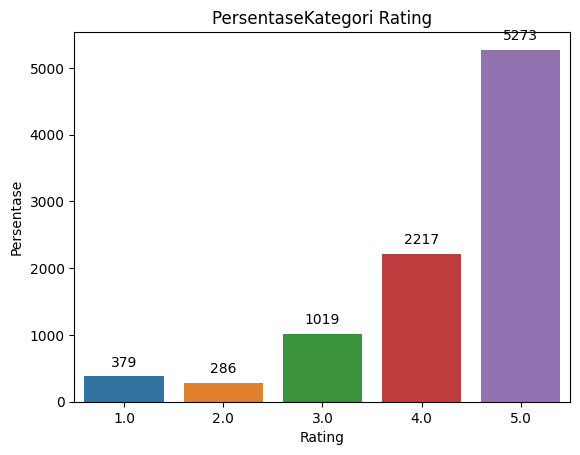

In [ ]:
ax = sns.countplot(x='stars', data=df_gabung)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('PersentaseKategori Rating')
plt.xlabel('Rating')
plt.ylabel('Persentase')

plt.show()

## Save df to csv file

In [ ]:
df_gabung.to_csv('feedback_dataset.csv', index=False)

In [ ]:
df_gabung.shape

(12743, 2)

In [3]:
file_name = "/content/hasil_fix_data_preprocesing.csv"
df = pd.read_csv(file_name)
df

Review Hasil Perbandingan
0                                    ['murah', 'meriah']            Neutral
1                     ['kenangan', 'tinggal', 'dikosan']           Positive
2                                                 ['ok']           Positive
3      ['tingkat', 'menu', 'menu', 'segarsegar', 'ya'...            Neutral
4                                              ['murah']           Positive
...                                                  ...                ...
12558  ['asik', 'nongkrong', 'menu', 'tersedia', 'len...           Positive
12559  ['harga', 'ramah', 'kantong', 'bagus', 'free',...           Positive
12560           ['lesehan', 'kotor', 'kotoran', 'cicak']           Negative
12561  ['luas', 'makananminuman', 'murah', 'membangga...            Neutral
12562  ['parkiran', 'los', 'dol', 'n', 'freemenu', 'm...            Neutral

[12563 rows x 2 columns]